In [1]:
import tensorflow as tf
import keras
from tensorflow.keras import preprocessing,optimizers,layers,models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [207]:
dataset_path = r"C:\Users\acer\Downloads\New folder"

Data/ Image Augmentation


Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


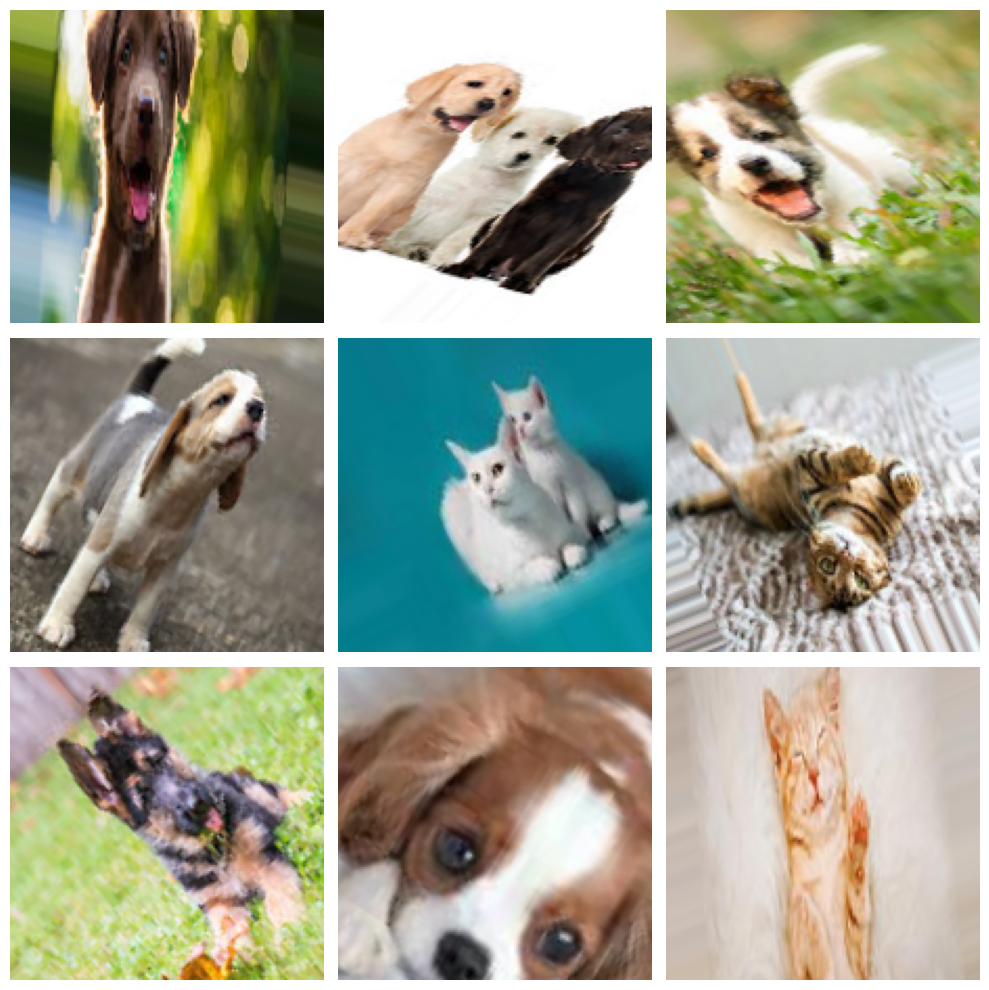

In [208]:
img_size = (150, 150)
batch_size = 32

# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    rotation_range=45,
    zoom_range=0.4,
    horizontal_flip=0.2,
    validation_split=0.2  # Split the data into training (80%) and validation (20%) sets
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use categorical mode for multi-class classification
    subset='training'  # Specify training subset
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

augmented_images, augmented_labels = next(train_generator)

# Plot a few augmented images along with their corresponding labels
plt.figure(figsize=(10, 10))
for i in range(9):  # Plotting 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')  # Turn off axis labels
plt.tight_layout()  # Adjust layout
plt.show()

CNN

In [197]:
cnn_model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(img_size[0], img_size[1], 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2,activation='softmax')
])
    

In [198]:
cnn_model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
cnn_model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 931ms/step - accuracy: 0.5260 - loss: 4.9500 - val_accuracy: 0.5000 - val_loss: 1.8731
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 675ms/step - accuracy: 0.5760 - loss: 1.2484 - val_accuracy: 0.5000 - val_loss: 0.7315
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 763ms/step - accuracy: 0.4875 - loss: 0.7846 - val_accuracy: 0.6500 - val_loss: 0.6541
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 666ms/step - accuracy: 0.5188 - loss: 0.6961 - val_accuracy: 0.6500 - val_loss: 0.6820
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 671ms/step - accuracy: 0.5273 - loss: 0.6759 - val_accuracy: 0.6000 - val_loss: 0.6869
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 755ms/step - accuracy: 0.5875 - loss: 0.6942 - val_accuracy: 0.6000 - val_loss: 0.6832
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 694ms/step - accuracy: 0.5625 - loss: 0.6762 - val_accuracy: 0.4500 - val_loss: 0.6917
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 633ms/step - accuracy: 0.5211 - loss: 0.6881 - val_accuracy: 0.5000 - val_loss:

In [199]:
cnn_model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)                   │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_57 (MaxPooling2D)      │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 73, 73, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_58 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_31 (Flatten)                 │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,766,376 (243.25 MB)

 Trainable params: 21,255,458 (81.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 42,510,918 (162.17 MB)

In [217]:
img_path = r'C:\Users\acer\Downloads\dog.jpeg'
img = image.load_img(img_path, target_size=(150, 150)) 
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) 
img_array /= 255.0 
predictions = cnn_model.predict(img_array)
class_index = np.argmax(predictions)
class_labels = ['Cat', 'Dog']  # Replace with your actual class labels
predicted_class = class_labels[int(np.round(predictions)[0][0])]
print("Predicted Class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Class: Dog


ANN (image classification)

In [220]:
ann_model=models.Sequential([
    tf.keras.layers.Flatten(input_shape=(150,150,3)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [221]:
ann_model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [222]:
ann_model.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 461ms/step - accuracy: 0.4250 - loss: 53.6854 - val_accuracy: 0.5000 - val_loss: 126.3741
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step - accuracy: 0.5063 - loss: 62.6941 - val_accuracy: 0.5000 - val_loss: 130.5164
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step - accuracy: 0.5078 - loss: 101.4809 - val_accuracy: 0.5000 - val_loss: 34.2068
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step - accuracy: 0.5156 - loss: 38.0404 - val_accuracy: 0.5000 - val_loss: 38.4773
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 325ms/step - accuracy: 0.5172 - loss: 31.2941 - val_accuracy: 0.5000 - val_loss: 33.7975
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step - accuracy: 0.4125 - loss: 27.0384 - val_accuracy: 0.5000 - val_loss: 20.9059
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step - accuracy: 0.4852 - loss: 24.0843 - val_accuracy: 0.5500 - val_loss: 15.4486
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step - accuracy: 0.5648 - loss: 16.8814 - val_accuracy: 

In [223]:
img_path = r'C:\Users\acer\Downloads\dog.jpeg'
img = image.load_img(img_path, target_size=(150, 150)) 
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) 
img_array /= 255.0 
predictions = ann_model.predict(img_array)
class_index = np.argmax(predictions)
class_labels = ['Cat', 'Dog']  # Replace with your actual class labels
predicted_class = class_labels[int(np.round(predictions)[0][0])]
print("Predicted Class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Class: Dog
